In [31]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation
import os
import matplotlib.pyplot as plt
import cv2
import os
import d2l
from mxnet import gluon, image, nd
import os
import tarfile
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers



Opening,downloading the dataset

In [32]:
def download_voc_pascal(data_dir='/home/alerti/Desktop/deep learning/VOCtrainval_11-May-2009'):
    """Download the VOC2009 segmentation dataset."""
    voc_dir = os.path.join(data_dir, 'VOCdevkit/VOC2009')
    #url = ('http://host.robots.ox.ac.uk/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar')
    #sha1 = '4e443f8a2eca6b1dac8a6c57641b67dd40621a49'
    #fname = gluon.utils.download(url, data_dir, sha1_hash=sha1)
    #fname= "/home/alerti/Desktop/deep learning/VOCtrainval_11-May-2009.tar"
    #with tarfile.open(fname, 'r') as f: """opening the .tar file"""
     #   f.extractall(data_dir)
    return voc_dir

voc_dir = download_voc_pascal() 


def read_voc_images(root='../data/VOCdevkit/VOC2009', is_train=True):
    """Read all VOC feature and label images."""
    txt_fname = '%s/ImageSets/Segmentation/%s' % (root, 'train.txt' if is_train else 'val.txt')
    with open(txt_fname, 'r') as f:
        images = f.read().split()
    features, labels = [None] * len(images), [None] * len(images)
    for i, fname in enumerate(images):
        features[i] = image.imread('%s/JPEGImages/%s.jpg' % (root, fname))
        labels[i] = image.imread(
            '%s/SegmentationClass/%s.png' % (root, fname))
    return features, labels

train_features, train_labels = read_voc_images(voc_dir, True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76bd5c6ac8>,
      dtype=object)

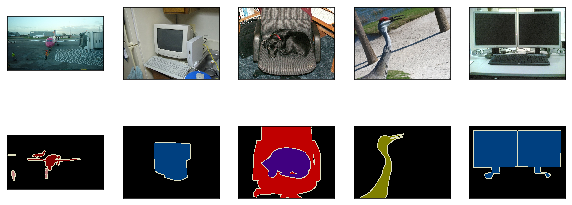

In [38]:

n = 5
imgs = train_features[0:n] + train_labels[0:n]
d2l.show_images(imgs, 2, n)

In [41]:
#we will use 749 image
len(train_features)

749

In [ ]:
#resize the images/dwonsample
